In [16]:
#import python library files
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
#reading the csv file
df=pd.read_csv("insurance.csv")

In [7]:
#Displaying the data
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [10]:
#Pre-processing Functions
df.head() #by default we get first 5 tuples

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [11]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [12]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [13]:
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [17]:
df.shape #gives total number of rows and columns

(1338, 7)

In [18]:
from sklearn.preprocessing import LabelEncoder

#conveting data into digital format. We are labelling the columns in digital format.
lab=LabelEncoder() #storing the module in variable lab

#Applying label encoder to columsn sex smoker region. After modifying storing it in same column.
df['sex']=lab.fit_transform(df['sex']) 
df['smoker']=lab.fit_transform(df['smoker'])
df['region']=lab.fit_transform(df['region'])

In [19]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


In [20]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


<AxesSubplot:xlabel='smoker', ylabel='count'>

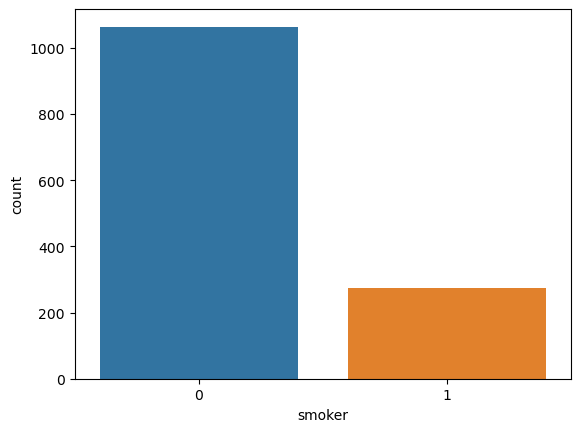

In [21]:
#DATA EXPLORATION
sns.countplot(x='smoker',data=df)

<AxesSubplot:xlabel='sex', ylabel='count'>

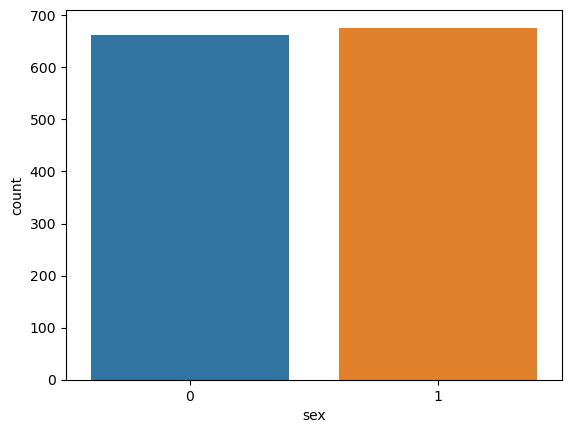

In [23]:
sns.countplot(x='sex',data=df)

<AxesSubplot:xlabel='region', ylabel='count'>

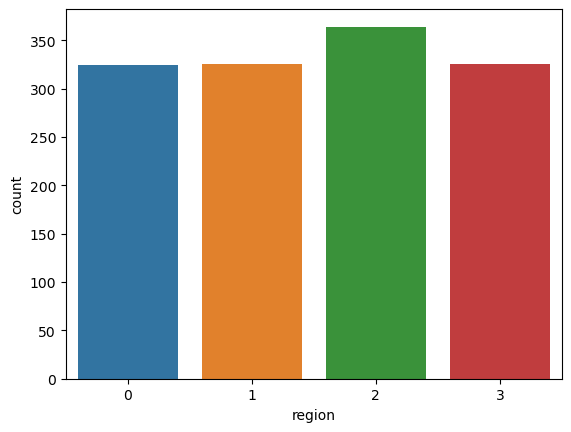

In [24]:
sns.countplot(x='region',data=df)

In [61]:
#DATA SPLITTING OR CLASSIFICATION INTO INPUT AND OUTPUT
x=df.iloc[:,df.columns!="charges"] #input
y=df.iloc[:,df.columns=="charges"] #output

x.head()

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,3
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,1
4,32,1,28.880,0,0,1


In [62]:
y.head()

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520


In [63]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,recall_score,roc_curve,auc #metrics used for mathematical calculation purposes 

In [64]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3) # 0.3=30% test, 70% train.

xtrain.head()

ytrain.head()

,charges
204,7147.10500
371,12029.28670
743,3757.84480
20,13228.84695
755,5031.26955


In [65]:
xtrain.head()

,age,sex,bmi,children,smoker,region
204,46,1,22.300,0,0,3
371,57,0,22.230,0,0,0
743,31,0,26.620,0,0,2
20,60,0,36.005,0,0,0
755,31,1,27.645,2,0,0


In [66]:
#APPLY THE ALGORITHM

In [67]:
#Random Forest Regressor or Algorithm
from sklearn.ensemble import RandomForestRegressor
regressor=RandomForestRegressor(n_estimators=300,random_state=0)
regressor.fit(xtrain,ytrain)

C:\Users\divij\AppData\Local\Temp\ipykernel_11620\1879124926.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(xtrain,ytrain)


RandomForestRegressor(n_estimators=300, random_state=0)

In [68]:
y_pred=regressor.predict(xtest)

In [69]:
y_pred

array([ 6762.43752797,  6328.77155367,  5339.95848493, 38582.1483056 ,
       36622.0920529 ,  5214.1346089 , 14711.43103003, 11275.83668163,
       43440.3944506 , 17127.79985533,  4583.6915404 , 18362.67187933,
        1556.13212983, 42776.88209157,  1639.254751  ,  5889.79307957,
       19738.9967479 ,  6830.68709627, 13704.30325473,  2222.84647117,
       14467.96705883,  5896.26459833, 20587.00183067,  7998.86455437,
        3978.6626698 ,  3352.22478127, 10822.46392333,  6338.21057533,
        7459.54950273,  4592.0901859 ,  7247.1846234 , 27976.77517853,
        3446.4083693 , 17701.5575318 ,  7813.61352427,  9401.13965253,
        5332.58589077, 15399.3445903 , 13089.36457427,  7757.56535387,
       13254.02104023,  6191.13471747,  5639.7494413 , 23786.17401317,
        9005.4902959 ,  7271.9729001 ,  6655.2940148 ,  3497.32182793,
       14571.61115307, 15953.58199263,  7018.48905117,  2393.50963543,
        8524.52598903,  5406.46759007,  5617.5352213 , 17926.14267383,
      

In [70]:
from sklearn import metrics
from sklearn.metrics import r2_score

print("\n\nr2 score is ",r2_score(y_pred,ytest))



r2 score is  0.8243964291877963


In [71]:
#LINEAR REGRESSION
from sklearn.linear_model import LinearRegression

alg=LinearRegression()
alg.fit(xtrain,ytrain)

y_predict=alg.predict(xtest)

print("\n\n r2 score is ",r2_score(y_predict,ytest))



 r2 score is  0.6921817426468182


In [ ]:
#DECISION TREE REGRESSOR

In [72]:
from sklearn import tree

dec=tree.DecisionTreeRegressor()
dec.fit(xtrain,ytrain)
x_predicted=dec.predict(xtest)
print("\n\nr2 score is ",r2_score(x_predicted,ytest))



r2 score is  0.6719931280927975


In [73]:
#PREDICTION ON NEW VECTOR
#We give completely new set of values to predict the outcome
test_vector=np.reshape(np.asarray([19,0,27.900,0,1,3]),(1,6))
p=int(regressor.predict(test_vector)[0])
p

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


16932